In [5]:
import folium

# Coordenadas do centro do Ceará para inicializar o mapa
ceara_center = [-5.4984, -39.3206]

# Cria o mapa centrado no Ceará
map_ceara = folium.Map(location=ceara_center, zoom_start=7)

# Lista de cidades com suas respectivas latitudes e longitudes
# cidades = [
#     {"nome": "Sobral", "lat": -3.74805555, "lon": -40.34583333},
#     {"nome": "Barbalha", "lat": -7.30083333, "lon": -39.2711111},
#     {"nome": "Tauá", "lat": -6.01749999, "lon": -40.28138888},
#     {"nome": "Morada Nova", "lat": -5.0911111, "lon": -38.36472222},
#     {"nome": "Jaguaruana", "lat": -4.83777777, "lon": -37.69972221},
#     {"nome": "Jaguaribe", "lat": -5.90555555, "lon": -38.62777777},
# ]

cidades = [
    {"nome": "Sobral", "lat": -3.74805555, "lon": -40.34583333},
    {"nome": "Jaguaribe", "lat": -5.90555555, "lon": -38.62777777},
    {"nome": "Tauá", "lat": -6.01749999, "lon": -40.28138888},
    {"nome": "Jaguaruana", "lat": -4.83777777, "lon": -37.69972221},
]

# Adiciona um marcador para cada cidade
for cidade in cidades:
    folium.Marker(
        location=[cidade["lat"], cidade["lon"]],
        popup=cidade["nome"],
    ).add_to(map_ceara)

# Salva o mapa em um arquivo HTML
map_ceara.save("output_loc_data/mapa_ceara.html")

# Exibir o mapa em um notebook Jupyter (se você estiver usando um)
map_ceara

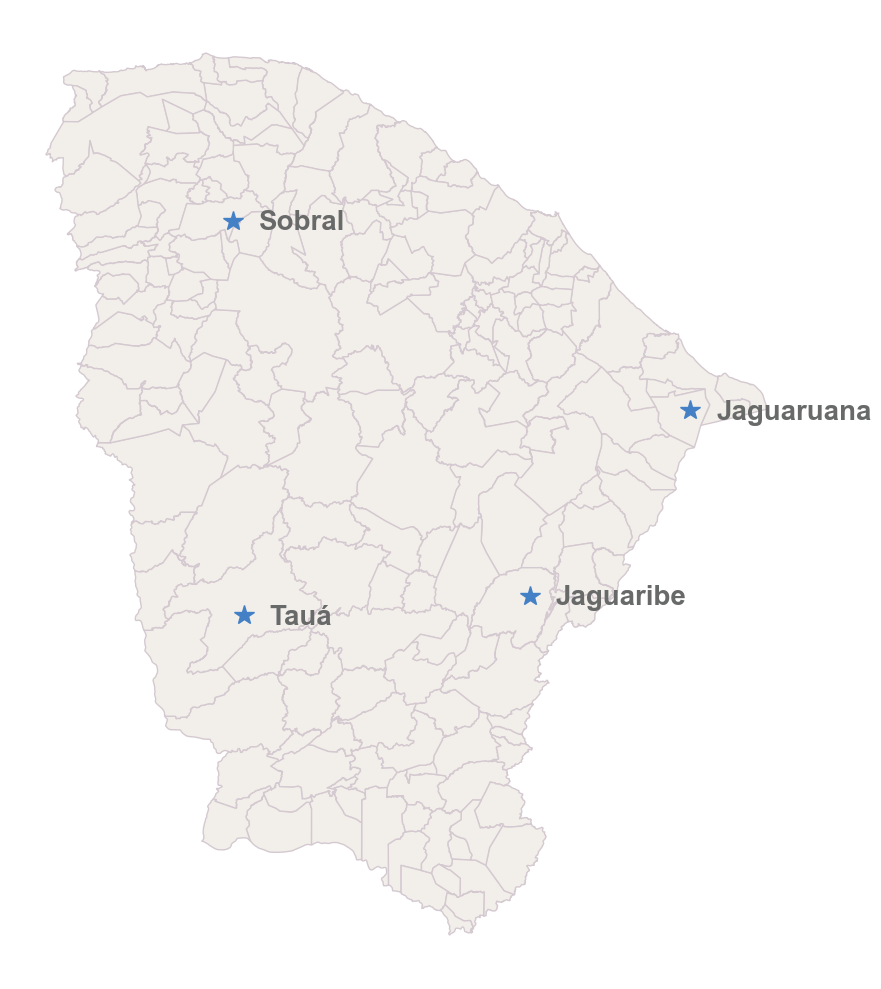

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carregar o shapefile dos municípios do Brasil
path = "input/BR_Municipios_2022/BR_Municipios_2022.shp"

# Carregar o shapefile do Brasil
brasil = gpd.read_file(path)

# Filtrar apenas o estado do Ceará
ceara = brasil[brasil["SIGLA_UF"] == "CE"]

# Criar um gráfico com um tamanho ajustado
fig, ax = plt.subplots(figsize=(10, 10))

# Definir a cor de fundo do gráfico
fig.patch.set_facecolor(
    "white"
)  # Cor de fundo ajustada (pode ser substituída por outra cor)

# Plotar o mapa do Ceará com uma cor mais suave
ceara.plot(ax=ax, color="#F2EFEA", edgecolor="#D4C9D0")

# Lista de cidades com suas respectivas latitudes e longitudes
cidades = [
    {"nome": "Sobral", "lat": -3.74805555, "lon": -40.34583333},
    {"nome": "Tauá", "lat": -6.01749999, "lon": -40.28138888},
    {"nome": "Jaguaruana", "lat": -4.83777777, "lon": -37.69972221},
    {"nome": "Jaguaribe", "lat": -5.90555555, "lon": -38.62777777},
]

# Adicionar os marcadores das cidades
for cidade in cidades:
    ax.plot(
        cidade["lon"],
        cidade["lat"],
        marker="*",
        color="#4480C5",
        markersize=15,
    )
    # Ajustar a posição do texto e mudar a cor para maior contraste
    ax.text(
        cidade["lon"] + 0.15,
        cidade["lat"] - 0.05,
        cidade["nome"],
        fontsize=20,
        color="#686969",
        weight="bold",
        fontfamily="Arial",
    )

# Definir título e remover eixos
# ax.set_title(
#     "Mapa do Ceará com Divisões Municipais e Cidades",
#     fontsize=18,
#     weight="bold",
#     fontfamily='Arial'
# )
ax.set_axis_off()


# Ajustar layout para não cortar nada
plt.tight_layout()

# Salvar o gráfico como uma imagem com maior qualidade
plt.savefig("output_loc_data/mapa_ceara.png", dpi=300, bbox_inches="tight")

# Mostrar o gráfico
plt.show()